In [1]:
!pip install numpy
!pip install pandas

In [2]:
!pip install sklearn matplotlib

In [3]:
!pip install pandas_datareader
!pip install datetime

     |████████████████████████████████| 61kB 3.7MB/s 
     |████████████████████████████████| 256kB 9.9MB/s 


In [4]:
"""
This code is for Multi Linear Regression. Included the analysis and Graphs in this.
"""

'\nThis code is for Multi Linear Regression. Included the analysis and Graphs in this.\n'

In [5]:
#Importing libraries

#For fast numerical operations on matrices
import numpy as np

#For dataframes
import pandas as pd

#Linear regression library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

#Plotting tool
import matplotlib.pyplot as plt


#date time
from datetime import datetime 

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

In [6]:
# Linear regression

#Getting data from yahoo API

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 5, end.month, end.day)

amazon_df = DataReader('AMZN', 'yahoo', start, end)

print(amazon_df)

                   High          Low  ...   Volume    Adj Close
Date                                  ...                      
2016-05-09   686.979980   671.409973  ...  3982200   679.750000
2016-05-10   704.549988   693.500000  ...  6105600   703.070007
2016-05-11   719.000000   701.650024  ...  7338200   713.229980
2016-05-12   722.450012   711.510010  ...  5048200   717.929993
2016-05-13   719.250000   706.510010  ...  4763400   709.919983
...                 ...          ...  ...      ...          ...
2021-05-03  3486.649902  3372.699951  ...  5875500  3386.489990
2021-05-04  3367.979980  3272.129883  ...  5439400  3311.870117
2021-05-05  3354.699951  3264.360107  ...  3711300  3270.540039
2021-05-06  3314.399902  3247.199951  ...  4442600  3306.370117
2021-05-07  3330.780029  3289.070312  ...  4506685  3291.610107

[1259 rows x 6 columns]


In [7]:
amazon_df["company_name"] = "AMAZON"

In [8]:
print(amazon_df)

                   High          Low  ...    Adj Close  company_name
Date                                  ...                           
2016-05-09   686.979980   671.409973  ...   679.750000        AMAZON
2016-05-10   704.549988   693.500000  ...   703.070007        AMAZON
2016-05-11   719.000000   701.650024  ...   713.229980        AMAZON
2016-05-12   722.450012   711.510010  ...   717.929993        AMAZON
2016-05-13   719.250000   706.510010  ...   709.919983        AMAZON
...                 ...          ...  ...          ...           ...
2021-05-03  3486.649902  3372.699951  ...  3386.489990        AMAZON
2021-05-04  3367.979980  3272.129883  ...  3311.870117        AMAZON
2021-05-05  3354.699951  3264.360107  ...  3270.540039        AMAZON
2021-05-06  3314.399902  3247.199951  ...  3306.370117        AMAZON
2021-05-07  3330.780029  3289.070312  ...  3291.610107        AMAZON

[1259 rows x 7 columns]


In [9]:
data = amazon_df
data = data.drop('Adj Close',axis=1)

In [10]:
data.reset_index(drop=True,inplace=True)
print(data)

             High          Low         Open        Close   Volume company_name
0      686.979980   671.409973   673.950012   679.750000  3982200       AMAZON
1      704.549988   693.500000   694.000000   703.070007  6105600       AMAZON
2      719.000000   701.650024   705.789978   713.229980  7338200       AMAZON
3      722.450012   711.510010   717.380005   717.929993  5048200       AMAZON
4      719.250000   706.510010   714.640015   709.919983  4763400       AMAZON
...           ...          ...          ...          ...      ...          ...
1254  3486.649902  3372.699951  3484.729980  3386.489990  5875500       AMAZON
1255  3367.979980  3272.129883  3356.189941  3311.870117  5439400       AMAZON
1256  3354.699951  3264.360107  3338.860107  3270.540039  3711300       AMAZON
1257  3314.399902  3247.199951  3270.000000  3306.370117  4442600       AMAZON
1258  3330.780029  3289.070312  3319.090088  3291.610107  4506685       AMAZON

[1259 rows x 6 columns]


In [11]:
data = data.drop('company_name',axis=1)
print(data)

             High          Low         Open        Close   Volume
0      686.979980   671.409973   673.950012   679.750000  3982200
1      704.549988   693.500000   694.000000   703.070007  6105600
2      719.000000   701.650024   705.789978   713.229980  7338200
3      722.450012   711.510010   717.380005   717.929993  5048200
4      719.250000   706.510010   714.640015   709.919983  4763400
...           ...          ...          ...          ...      ...
1254  3486.649902  3372.699951  3484.729980  3386.489990  5875500
1255  3367.979980  3272.129883  3356.189941  3311.870117  5439400
1256  3354.699951  3264.360107  3338.860107  3270.540039  3711300
1257  3314.399902  3247.199951  3270.000000  3306.370117  4442600
1258  3330.780029  3289.070312  3319.090088  3291.610107  4506685

[1259 rows x 5 columns]


In [12]:
data_X = data.loc[:,data.columns !=  'Close' ]
data_Y = data['Close']

In [13]:
train_X, test_X, train_y,test_y = train_test_split(data_X,data_Y,test_size=0.25)

In [14]:
#Creating the Regressor
regressor = LinearRegression()
regressor.fit(train_X,train_y)
print(regressor.coef_)
print(regressor.intercept_)

[ 7.54627763e-01  7.96601246e-01 -5.50937406e-01  2.63885882e-07]
0.20094890824680078


In [15]:
predict_y = regressor.predict(test_X)
print('Prediction Score : ' , regressor.score(test_X,test_y))
error = mean_squared_error(test_y,predict_y)
print('Mean Squared Error : ',error)

Prediction Score :  0.9997228242224382
Mean Squared Error :  177.67300123218217


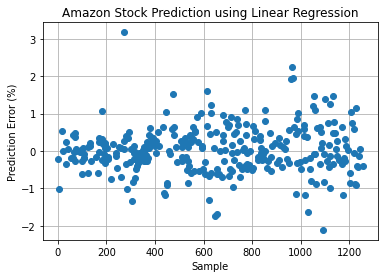

In [16]:
#Plot the predicted and the expected values
fig = plt.figure()
ax = plt.axes()
ax.grid()
ax.set(xlabel='Sample',ylabel='Prediction Error (%)', title='Amazon Stock Prediction using Linear Regression')
ax.plot(((test_y-predict_y) / test_y)*100 ,marker = 'o',linestyle='')
#ax.plot(test_X['Open'],predict_y)
fig.savefig('LRPlot.png')
plt.show()

In [17]:
#Finding the correlation
corr = data.corr(method='pearson')
corr

,High,Low,Open,Close,Volume
High,1.000000,0.999517,0.999706,0.999647,0.120549
Low,0.999517,1.000000,0.999589,0.999674,0.099751
Open,0.999706,0.999589,1.000000,0.999276,0.112115
Close,0.999647,0.999674,0.999276,1.000000,0.109810
Volume,0.120549,0.099751,0.112115,0.109810,1.000000


In [18]:
data = data.drop(['High','Low'],axis=1)
print(data)

             Open        Close   Volume
0      673.950012   679.750000  3982200
1      694.000000   703.070007  6105600
2      705.789978   713.229980  7338200
3      717.380005   717.929993  5048200
4      714.640015   709.919983  4763400
...           ...          ...      ...
1254  3484.729980  3386.489990  5875500
1255  3356.189941  3311.870117  5439400
1256  3338.860107  3270.540039  3711300
1257  3270.000000  3306.370117  4442600
1258  3319.090088  3291.610107  4506685

[1259 rows x 3 columns]


In [19]:
data_X = data.loc[:,data.columns !=  'Close' ]
data_Y = data['Close']
train_X, test_X, train_y,test_y = train_test_split(data_X,data_Y,test_size=0.25)
regressor = LinearRegression()

#Feature scaling is present here as inbuilt feature
regressor.fit(train_X,train_y)
predict_y = regressor.predict(test_X)
print('Prediction Score : ' , regressor.score(test_X,test_y))
error = mean_squared_error(test_y,predict_y)
print('Mean Squared Error : ',error)
print(np.mean(np.abs((test_y - predict_y) / test_y)) * 100)

Prediction Score :  0.9982917354739483
Mean Squared Error :  1090.6453287580273
1.0963733516979315


[ 9.98090183e-01 -1.94448962e-07]
4.128289828879588
0        679.750000
1        703.070007
2        713.229980
3        717.929993
4        709.919983
           ...     
1254    3386.489990
1255    3311.870117
1256    3270.540039
1257    3306.370117
1258    3291.610107
Name: Close, Length: 1259, dtype: float64


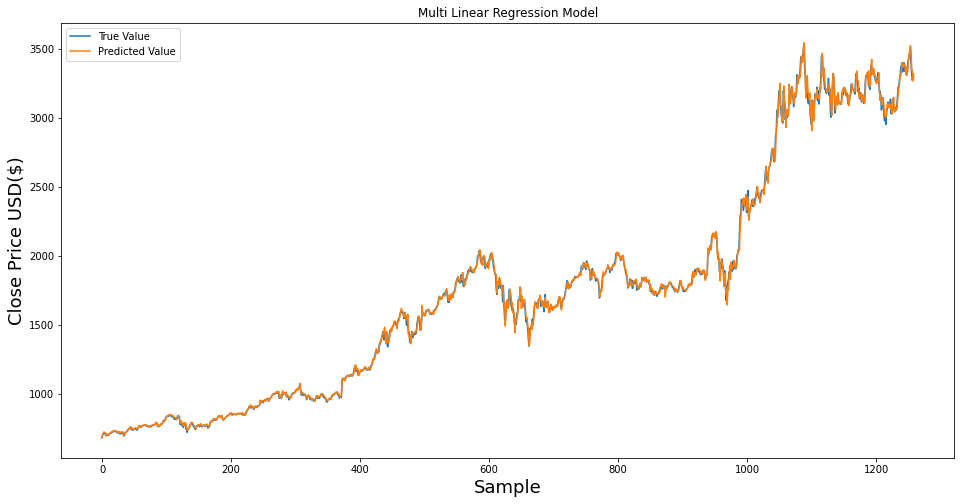

In [20]:
plt.figure(figsize=(16,8))
plt.title('Multi Linear Regression Model')
plt.xlabel('Sample',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
print(regressor.coef_)
print(regressor.intercept_)
print(data['Close'])
close_pred = []
actual_val = []

for i in range(len(data_X)):
    val = data_X['Open'][i]* regressor.coef_[0] - data_X['Volume'][i] * regressor.coef_[1] + regressor.intercept_ 
    close_pred.append(val)
    actual_val.append(data_Y[i])

plt.plot(actual_val)
plt.plot(close_pred)
plt.legend(['True Value','Predicted Value'])